# README

## Installation

TODO

## Documentation
API documentation for the package is available at http://bsharchilev.github.io/RobustPCA.

## Examples

In [1]:
import rpca
from rpca import data

# Load "Sleep in Mammals" database
X = rpca.data.load_sleep()

# Transform it using Robust PCA
huber_loss = rpca.loss.HuberLoss(delta=1)
rpca_transformer = rpca.MRobustPCA(2, huber_loss)
X_rpca = rpca_transformer.fit_transform(X)

[RPCA] Iteraton 1: error 433.088587, relative error inf
[RPCA] Iteraton 2: error 407.667139, relative error 0.062358
[RPCA] Iteraton 3: error 398.040898, relative error 0.024184
[RPCA] Iteraton 4: error 385.338315, relative error 0.032965
[RPCA] Iteraton 5: error 338.966250, relative error 0.136804
[RPCA] Iteraton 6: error 278.488347, relative error 0.217165
[RPCA] Iteraton 7: error 270.495974, relative error 0.029547
[RPCA] Iteraton 8: error 267.039948, relative error 0.012942
[RPCA] Iteraton 9: error 264.705590, relative error 0.008819
[RPCA] Iteraton 10: error 263.316343, relative error 0.005276
[RPCA] Iteraton 11: error 262.834320, relative error 0.001834
[RPCA] Iteraton 12: error 262.704512, relative error 0.000494
[RPCA] Iteraton 13: error 262.671634, relative error 0.000125
[RPCA] Iteraton 14: error 262.663055, relative error 0.000033
[RPCA] Iteraton 15: error 262.660775, relative error 0.000009
[RPCA] Iteraton 16: error 262.660161, relative error 0.000002
[RPCA] Iteraton 17: er

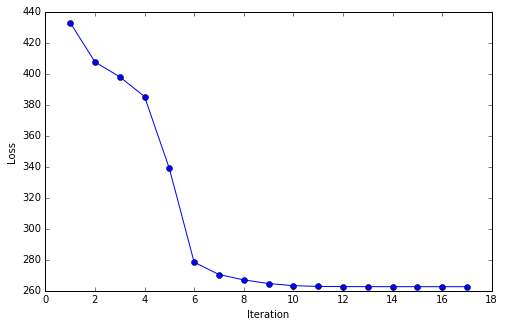

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot progress during iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, rpca_transformer.n_iterations_ + 1), rpca_transformer.errors_, '-o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

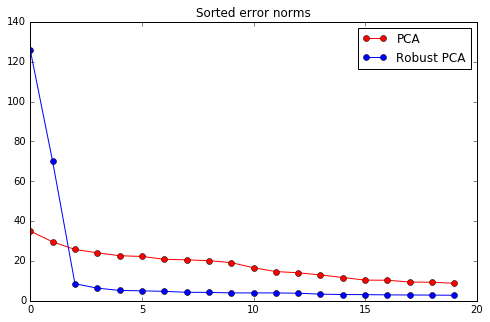

In [3]:
# Compare our method with regular PCA
from sklearn.decomposition import PCA
pca_transformer = PCA(2)
X_pca = pca_transformer.fit_transform(X)

# Calculate error norms for both methods
import numpy as np
def error_norms(components):
    n_samples, n_features = X.shape
    non_projected_matrix = np.identity(n_features) - components.T.dot(components)
    return np.sqrt(np.diag(X.dot(non_projected_matrix.dot(X.T))))

errors_pca, errors_rpca = error_norms(pca_transformer.components_), error_norms(rpca_transformer.components_)

plt.figure(figsize=(8, 5))
plt.plot(sorted(errors_pca, key=lambda x:-x)[:20], '-o', label='PCA', color='r')
plt.plot(sorted(errors_rpca, key=lambda x:-x)[:20], '-o', label='Robust PCA', color='b')
plt.title('Sorted error norms')
plt.legend()
plt.show()